In [2]:
import uproot
import pandas
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 24})

In [7]:
root_file = '/eos/user/m/mkovac/Data/Muon_WP_tuning/ZZTo4l/ZZ4lAnalysis.root'

tree = uproot.open(root_file)["ZZTree/candTree"]

In [8]:
df = tree.pandas.df(['ZZsel','LepEta','ZZMass','Z1Flav','Z2Flav','LepPt','LepBDT','KFactor_EW_qqZZ','KFactor_QCD_qqZZ_M','xsec','overallEventWeight'],entrystop=None, flatten=False)


In [9]:
hCounters = uproot.open(root_file)["ZZTree/Counters"]

gen_sum_weights = hCounters[40]

In [10]:
df = df.query('ZZsel >= 90')

num_of_leptons = df['LepEta'].apply(lambda x: len(x))
df['num_of_leptons'] = num_of_leptons

df = df.query('num_of_leptons == 4')
df = df.query('ZZMass >= 118 and ZZMass <= 130')

In [11]:
# abs(df["LepPt"])

# B_5 = (df['LepPt'][5] < 10) & (abs(df['LepEta'][5]) < 1.2)
# B_5
# condlist_75_95   = [df['LepPt'][5] <  10 && abs(df['LepEta'][5]) < 1.2]
    
# choicelist_75_95 = [df['LepBDT'][i] > 1.73446324467659,
#                         df['LepBDT'][i] > 0.6136413216590881,
#                         df['LepBDT'][i] > 2.441141128540039,
#                         df['LepBDT'][i] > 1.5527301788330146
#                        ]

# df['LepPt'][0]

# for i in df.index:
#     print (i)

## 4mu only

In [12]:
df = df.query('Z1Flav == -169 and Z2Flav == -169')

isBDT_75_95 = []
isBDT_80_96 = []
isBDT_85_97 = []
isBDT_90_98 = []
isBDT_95_99 = []


for i in df.index:
    condlist_75_95   = [(df['LepPt'][i] <  10) & (abs(df['LepEta'][i]) < 1.2),
                        (df['LepPt'][i] >= 10) & (abs(df['LepEta'][i]) < 1.2),
                        (df['LepPt'][i] <  10) & (abs(df['LepEta'][i]) >= 1.2),
                        (df['LepPt'][i] >= 10) & (abs(df['LepEta'][i]) >= 1.2)
                       ]
    
    choicelist_75_95 = [df['LepBDT'][i] > 1.73446324467659,
                        df['LepBDT'][i] > 0.6136413216590881,
                        df['LepBDT'][i] > 2.441141128540039,
                        df['LepBDT'][i] > 1.5527301788330146
                       ]
    
    temp_75_95 = (np.select(condlist_75_95, choicelist_75_95))
    isBDT_75_95_temp = temp_75_95.all()
    isBDT_75_95.append(isBDT_75_95_temp)
    
    
    
    condlist_80_96   = [(df['LepPt'][i] <  10) & (abs(df['LepEta'][i]) < 1.2),
                        (df['LepPt'][i] >= 10) & (abs(df['LepEta'][i]) < 1.2),
                        (df['LepPt'][i] <  10) & (abs(df['LepEta'][i]) >= 1.2),
                        (df['LepPt'][i] >= 10) & (abs(df['LepEta'][i]) >= 1.2)
                       ]
    
    choicelist_80_96 = [df['LepBDT'][i] > 1.4778424501419063,
                        df['LepBDT'][i] > 0.16950652003289526,
                        df['LepBDT'][i] > 2.2214415073394767,
                        df['LepBDT'][i] > 1.2279906272888184
                       ]
    
    temp_80_96 = (np.select(condlist_80_96, choicelist_80_96))
    isBDT_80_96_temp = temp_80_96.all()
    isBDT_80_96.append(isBDT_80_96_temp)
    
    
    
    condlist_85_97   = [(df['LepPt'][i] <  10) & (abs(df['LepEta'][i]) < 1.2),
                        (df['LepPt'][i] >= 10) & (abs(df['LepEta'][i]) < 1.2),
                        (df['LepPt'][i] <  10) & (abs(df['LepEta'][i]) >= 1.2),
                        (df['LepPt'][i] >= 10) & (abs(df['LepEta'][i]) >= 1.2)
                       ]
    
    choicelist_85_97 = [df['LepBDT'][i] > 1.153916329145432,
                        df['LepBDT'][i] > -0.3525409996509552,
                        df['LepBDT'][i] > 1.94111499786377,
                        df['LepBDT'][i] > 0.738214094638828
                       ]
    
    temp_85_97 = (np.select(condlist_85_97, choicelist_85_97))
    isBDT_85_97_temp = temp_85_97.all()
    isBDT_85_97.append(isBDT_85_97_temp)
    
    
    
    condlist_90_98   = [(df['LepPt'][i] <  10) & (abs(df['LepEta'][i]) < 1.2),
                        (df['LepPt'][i] >= 10) & (abs(df['LepEta'][i]) < 1.2),
                        (df['LepPt'][i] <  10) & (abs(df['LepEta'][i]) >= 1.2),
                        (df['LepPt'][i] >= 10) & (abs(df['LepEta'][i]) >= 1.2)
                       ]
    
    choicelist_90_98 = [df['LepBDT'][i] > 0.6300530433654785,
                        df['LepBDT'][i] > -0.9337482452392578,
                        df['LepBDT'][i] > 1.4816066980361935,
                        df['LepBDT'][i] > -0.08921787619590255
                       ]
    
    temp_90_98 = (np.select(condlist_90_98, choicelist_90_98))
    isBDT_90_98_temp = temp_90_98.all()
    isBDT_90_98.append(isBDT_90_98_temp)
    
    
    
    condlist_95_99   = [(df['LepPt'][i] <  10) & (abs(df['LepEta'][i]) < 1.2),
                        (df['LepPt'][i] >= 10) & (abs(df['LepEta'][i]) < 1.2),
                        (df['LepPt'][i] <  10) & (abs(df['LepEta'][i]) >= 1.2),
                        (df['LepPt'][i] >= 10) & (abs(df['LepEta'][i]) >= 1.2)
                       ]
    
    choicelist_95_99 = [df['LepBDT'][i] > -0.4623236134648287,
                        df['LepBDT'][i] > -2.0780179500579834,
                        df['LepBDT'][i] > 0.5210796594619753,
                        df['LepBDT'][i] > -1.6563756227493285
                       ]    
    
    temp_95_99 = (np.select(condlist_95_99, choicelist_95_99))
    isBDT_95_99_temp = temp_95_99.all()
    isBDT_95_99.append(isBDT_95_99_temp)
    

df['isBDT_75_95'] = isBDT_75_95
df['isBDT_80_96'] = isBDT_80_96
df['isBDT_85_97'] = isBDT_85_97
df['isBDT_90_98'] = isBDT_90_98
df['isBDT_95_99'] = isBDT_95_99

df_75_95 = df.query('isBDT_75_95 == True')
df_80_96 = df.query('isBDT_80_96 == True')
df_85_97 = df.query('isBDT_85_97 == True')
df_90_98 = df.query('isBDT_90_98 == True')
df_95_99 = df.query('isBDT_95_99 == True')

In [13]:
k_factor = df['KFactor_EW_qqZZ']*df['KFactor_QCD_qqZZ_M']
event_weight = (35.9*1000*df['xsec']*k_factor*df['overallEventWeight'])/gen_sum_weights

k_factor = df_75_95['KFactor_EW_qqZZ']*df_75_95['KFactor_QCD_qqZZ_M']
event_weight_75_95 = (35.9*1000*df_75_95['xsec']*k_factor*df_75_95['overallEventWeight'])/gen_sum_weights

k_factor = df_80_96['KFactor_EW_qqZZ']*df_80_96['KFactor_QCD_qqZZ_M']
event_weight_80_96 = (35.9*1000*df_80_96['xsec']*k_factor*df_80_96['overallEventWeight'])/gen_sum_weights

k_factor = df_85_97['KFactor_EW_qqZZ']*df_85_97['KFactor_QCD_qqZZ_M']
event_weight_85_97 = (35.9*1000*df_85_97['xsec']*k_factor*df_85_97['overallEventWeight'])/gen_sum_weights

k_factor = df_90_98['KFactor_EW_qqZZ']*df_90_98['KFactor_QCD_qqZZ_M']
event_weight_90_98 = (35.9*1000*df_90_98['xsec']*k_factor*df_90_98['overallEventWeight'])/gen_sum_weights

k_factor = df_95_99['KFactor_EW_qqZZ']*df_95_99['KFactor_QCD_qqZZ_M']
event_weight_95_99 = (35.9*1000*df_95_99['xsec']*k_factor*df_95_99['overallEventWeight'])/gen_sum_weights

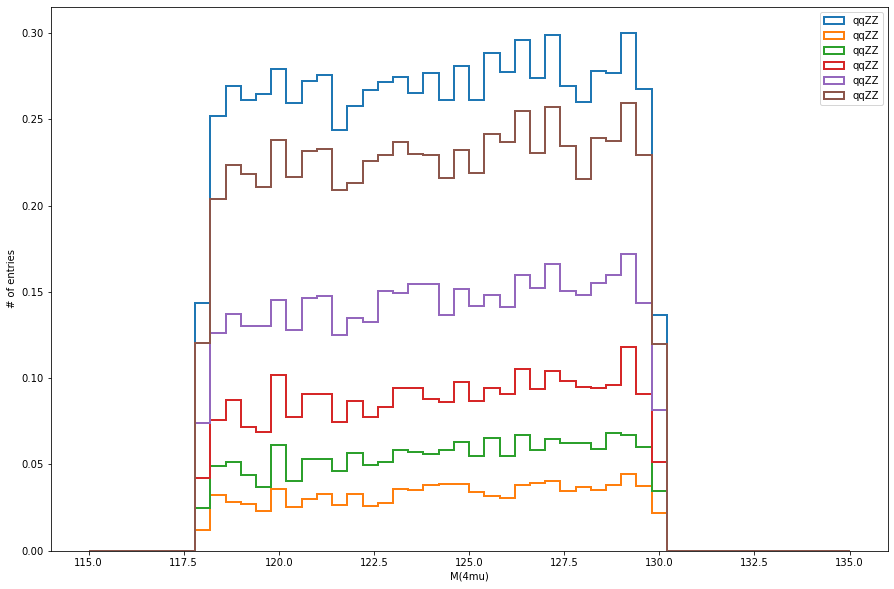

In [14]:
plt.figure(figsize = (15,10))
# plt.yscale('log')
values, bins, _       = plt.hist(df['ZZMass'], bins=50, histtype='step', linewidth=2, weights=event_weight      , range=[115,135], label='qqZZ')
values_75_95, bins, _ = plt.hist(df_75_95['ZZMass'], bins=50, histtype='step', linewidth=2, weights=event_weight_75_95, range=[115,135], label='qqZZ')
values_80_96, bins, _ = plt.hist(df_80_96['ZZMass'], bins=50, histtype='step', linewidth=2, weights=event_weight_80_96, range=[115,135], label='qqZZ')
values_85_97, bins, _ = plt.hist(df_85_97['ZZMass'], bins=50, histtype='step', linewidth=2, weights=event_weight_85_97, range=[115,135], label='qqZZ')
values_90_98, bins, _ = plt.hist(df_90_98['ZZMass'], bins=50, histtype='step', linewidth=2, weights=event_weight_90_98, range=[115,135], label='qqZZ')
values_95_99, bins, _ = plt.hist(df_95_99['ZZMass'], bins=50, histtype='step', linewidth=2, weights=event_weight_95_99, range=[115,135], label='qqZZ')

plt.title('')
plt.ylabel('# of entries')
plt.xlabel('M(4mu)')
plt.legend()
# values

In [16]:
yield_99_99 = '{:.2f}'.format(sum(values))
print (yield_99_99)

yield_75_95 = '{:.2f}'.format(sum(values_75_95))
print (yield_75_95)

yield_80_96 = '{:.2f}'.format(sum(values_80_96))
print (yield_80_96)

yield_85_97 = '{:.2f}'.format(sum(values_85_97))
print (yield_85_97)

yield_90_98 = '{:.2f}'.format(sum(values_90_98))
print (yield_90_98)

yield_95_99 = '{:.2f}'.format(sum(values_95_99))
print (yield_95_99)

8.16
1.01
1.69
2.71
4.38
6.89
